# **Computational Drug Discovery**

Om Rabadia

Using data science to build a machine learning model.

Data is given using the [*ChEMBL bioactivity*](https://www.ebi.ac.uk/chembl/) database (Version 33, Data as of September 30, 2023)



In [5]:
! pip install chembl_webresource_client
# Using Conda environment
# Command Purpose : Pull data from the database

In [6]:
import pandas as pd #library for working with datasets
from chembl_webresource_client.new_client import new_client

We will be searching for Target proteins that cause Alzheimers

In [7]:
target_search = new_client.target.search('Alzheimers')
targets = pd.DataFrame.from_dict(target_search)
targets


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,6.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'Q92542', 'xref_name': None, 'xre...",Homo sapiens,Nicastrin,5.0,False,CHEMBL3418,"[{'accession': 'Q92542', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Gamma-secretase,5.0,False,CHEMBL2094135,"[{'accession': 'Q96BI3', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Rattus norvegicus,Amyloid beta A4 protein,4.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Mus musculus,Amyloid-beta A4 protein,4.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
5,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Beta amyloid A4 protein,3.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


We will be selecting Entry 5 (Beta amyloid A4 protein), as this protein contributes to Alzheimer pathogenesis.

In [8]:
BetaA4Amyloid = targets.target_chembl_id[5]
BetaA4Amyloid

'CHEMBL2487'

Now we want to filter and retrieve data for the Beta amyloid A4 protein, which is identified as CHEMBL2487, that is reported as IC50 values (measure of drug efficacy).

IC50 is reported in nM.

In [9]:
resulting_list = new_client.activity.filter(target_chembl_id=BetaA4Amyloid).filter(standard_type="IC50")
dataframe = pd.DataFrame.from_dict(resulting_list)
dataframe.head(4) #show first 4

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0


In [10]:
dataframe.standard_type.unique()
dataframe.to_csv('bioactivity_data.csv', index=False)
dataframe_without_missingData = dataframe[dataframe.standard_value.notna()]
dataframe_without_missingData # to drop compounds if they have no standard value

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890291,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,0.777
1563,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890292,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,31.76
1564,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890293,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.9539999999999997
1565,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890294,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,15.04


In [11]:
! head bioactivity_data.csv #make sure it was created and show a preview

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiting Gamma-secretase proteolytic pathway in HEK293 cell stably transfected with a double mutant form of human APP(K595N/M596L),B,,,BAO_0000190,BAO_0000219,cell-based format,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,,,CHEMBL1133739,J Med Chem

Now we need to pre-process the data.

Based on the IC50 unit, Compounds use these thresholds:

- < 1000 nM = *active*  
- *>* 10,0000 nM = *inactive*  
- 1000 nM < IC50 < 10,0000 nM = *intermediate*



In [43]:
classification = []
for compound in dataframe_without_missingData.standard_value:
    if float(compound) <= 1000:
        classification.append("active")
    elif float(compound) >= 10000:
        classification.append("inactive")
    elif float(compound) >= 1000 and float(compound) <= 10000:
        classification.append("intermediate")
classification      

['intermediate',
 'intermediate',
 'intermediate',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'active',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'active',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'intermediate',
 'active',
 'intermediate',
 'inactive',
 'intermediate',
 'active',
 'active',
 'active',
 'intermediate',
 'intermediate',
 'intermediate',
 'intermediate',
 'intermediate',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'ac

We can also create different lists based on the data

In [44]:
molecular_chembl_ids = []
for c in dataframe_without_missingData.molecule_chembl_id:
  molecular_chembl_ids.append(c)
molecular_chembl_ids

['CHEMBL311039',
 'CHEMBL450926',
 'CHEMBL310242',
 'CHEMBL74874',
 'CHEMBL75183',
 'CHEMBL563',
 'CHEMBL196279',
 'CHEMBL195970',
 'CHEMBL195970',
 'CHEMBL264006',
 'CHEMBL264006',
 'CHEMBL193971',
 'CHEMBL194274',
 'CHEMBL196321',
 'CHEMBL196322',
 'CHEMBL380778',
 'CHEMBL197202',
 'CHEMBL194760',
 'CHEMBL196246',
 'CHEMBL196246',
 'CHEMBL196945',
 'CHEMBL196945',
 'CHEMBL196946',
 'CHEMBL196946',
 'CHEMBL372751',
 'CHEMBL372751',
 'CHEMBL194692',
 'CHEMBL196947',
 'CHEMBL196947',
 'CHEMBL372846',
 'CHEMBL372846',
 'CHEMBL427548',
 'CHEMBL197140',
 'CHEMBL382721',
 'CHEMBL436483',
 'CHEMBL196070',
 'CHEMBL193900',
 'CHEMBL193900',
 'CHEMBL194020',
 'CHEMBL190083',
 'CHEMBL200116',
 'CHEMBL199946',
 'CHEMBL202877',
 'CHEMBL425031',
 'CHEMBL200014',
 'CHEMBL202507',
 'CHEMBL200077',
 'CHEMBL204357',
 'CHEMBL206766',
 'CHEMBL204443',
 'CHEMBL381336',
 'CHEMBL205400',
 'CHEMBL205714',
 'CHEMBL208230',
 'CHEMBL424684',
 'CHEMBL274414',
 'CHEMBL208504',
 'CHEMBL205970',
 'CHEMBL410532',
 '

We can write the canonical smiles format of compounds into a list

In [45]:
canonical_smiles_output = []
for c in dataframe_without_missingData.canonical_smiles:
  canonical_smiles_output.append(c)
canonical_smiles_output

['CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(F)cc1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1',
 'CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2ccc(C3CCCCC3)cc2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2ccc(C3CCCCC3)cc2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2ccc(C(F)(F)F)cc2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2csc3ccccc23)c(F)c1',
 'COc1ccc(-c2ccc(C(C)C(=O)O)cc2F)cc1',
 'CC(C(=O)O)c1ccc(-c2ccc3c(c2)OCO3)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2ccc(OC3CCCCC3)cc2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2ccc(-c3ccc(O)cc3)cc2)c(F)c1',
 'O=C(O)C1(c2ccc(-c3ccccc3)c(F)c2)CC1',
 'O=C(O)C1(c2ccc(-c3ccc(C(F)(F)F)cc3)c(F)c2)CC1',
 'O=C(O)C1(c2ccc(-c3ccc(C(F)(F)F)cc3)c(F)c2)CC1',
 'O=C(O)C1(c2ccc(-c3ccc(Cl)c(Cl)c3)c(F)c2)CC1',
 'O=C(O

Standard Values into a list

In [46]:
standard_values = []
for c in dataframe_without_missingData.standard_value:
    standard_values.append(c)
standard_values

['5000.0',
 '2700.0',
 '1800.0',
 '11000.0',
 '10000.0',
 '305000.0',
 '75000.0',
 '77000.0',
 '94000.0',
 '21000.0',
 '46000.0',
 '129000.0',
 '83000.0',
 '67000.0',
 '210000.0',
 '41000.0',
 '35000.0',
 '-1.0',
 '111000.0',
 '22000.0',
 '41000.0',
 '14000.0',
 '96300.0',
 '-5.0',
 '46000.0',
 '101000.0',
 '70600.0',
 '31600.0',
 '409000.0',
 '33600.0',
 '111000.0',
 '57900.0',
 '11000.0',
 '81000.0',
 '17700.0',
 '114000.0',
 '64000.0',
 '12000.0',
 '20000.0',
 '280000.0',
 '6700.0',
 '5.2',
 '6000.0',
 '20000.0',
 '9900.0',
 '740.0',
 '180.0',
 '200.0',
 '6800.0',
 '3000.0',
 '6000.0',
 '3000.0',
 '5000.0',
 '74.0',
 '30.0',
 '160.0',
 '17.0',
 '152.0',
 '54.0',
 '17.0',
 '29.0',
 '15.0',
 '530.0',
 '16.0',
 '180.0',
 '140.0',
 '120.0',
 '540.0',
 '450.0',
 '650.0',
 '600.0',
 '73.0',
 '60.0',
 '360.0',
 '190.0',
 '900.0',
 '180.0',
 '1000.0',
 '680.0',
 '880.0',
 '780.0',
 '1900.0',
 '86.0',
 '280.0',
 '220.0',
 '0.3',
 '56.0',
 '47.0',
 '46.0',
 '17.0',
 '14.0',
 '12.0',
 '27.0',


We can now make a dataframe out of these lists.

In [47]:
dfCombined = pd.DataFrame(list(zip(molecular_chembl_ids, canonical_smiles_output, classification, standard_values)),  columns=['molecule_chembl_id', 'canonical_smiles', 'classification', 'standard_value'])
dfCombined



,molecule_chembl_id,canonical_smiles,classification,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,10000.0
...,...,...,...,...
1388,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,777.0
1389,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,31760.0
1390,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,intermediate,2954.0
1391,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,inactive,15040.0


In [48]:
dfCombined.to_csv('bioactivity_preprocessed_data.csv', index=False)
! head bioactivity_preprocessed_data.csv

molecule_chembl_id,canonical_smiles,classification,standard_value
CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5000.0
CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,2700.0
CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(F)cc1,intermediate,1800.0
CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1,inactive,11000.0
CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1,inactive,10000.0
CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,305000.0
CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,75000.0
CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,77000.0
CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,94000.0


# **Descriptor Calculation and Exploratory Data Analysis**

- Use conda to install rdkit, an open-source toolkit for cheminformatics.
- Import necessary packages

In [49]:
import pandas as pd
preprocessed_df = pd.read_csv('bioactivity_preprocessed_data.csv')
preprocessed_df #check if successful
import numpy as np

Using Lipinkski Descriptors and pharmacokinetic profiles to evaluate druglikeness

MW < 500 Dalton
LogP <5
HBond Donors <5
HBond Acceptors <10

In [50]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
# Switching to rdkit environment

# Function inspired by https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinskiCalc(csmiles, verbose=False):

    molecular_data = []
    for el in csmiles:
        mol = Chem.MolFromSmiles(el) 
        molecular_data.append(mol)
       
    baseData = np.arange(1,1)
    i = 0  
    for mol in molecular_data:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i == 0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i += 1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [51]:
LipDF = lipinskiCalc(preprocessed_df.canonical_smiles)
LipDF

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.31880,1.0,2.0
1,299.461,3.24120,1.0,3.0
2,311.422,3.31880,1.0,2.0
3,327.877,3.83310,1.0,2.0
4,372.328,3.94220,1.0,2.0
...,...,...,...,...
1388,360.377,4.03670,2.0,6.0
1389,360.377,3.33790,1.0,7.0
1390,256.349,2.82622,2.0,3.0
1391,325.456,3.16612,1.0,4.0


Combining dataframes

In [52]:
df_combined = pd.concat([preprocessed_df, LipDF], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,classification,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5000.0,311.422,3.31880,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,2700.0,299.461,3.24120,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,1800.0,311.422,3.31880,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,11000.0,327.877,3.83310,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,10000.0,372.328,3.94220,1.0,2.0
...,...,...,...,...,...,...,...,...
1388,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,777.0,360.377,4.03670,2.0,6.0
1389,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,31760.0,360.377,3.33790,1.0,7.0
1390,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,intermediate,2954.0,256.349,2.82622,2.0,3.0
1391,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,inactive,15040.0,325.456,3.16612,1.0,4.0


We should convert IC50 to pIC50 to make data more uniformly distributed (-log10(IC50))

In [53]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb
import numpy as np
def pIC50_Calc(input):
    pIC50_list = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9) # Converts nM to M
        pIC50_list.append(-np.log10(molar))

    input['pIC50'] = pIC50_list
    x = input.drop('standard_value_norm', axis = 1)
        
    return x

df_combined.standard_value.describe()

count      1393.000000
mean      20087.910876
std       52580.435486
min          -5.000000
25%         250.000000
50%        4800.000000
75%       16800.000000
max      800000.000000
Name: standard_value, dtype: float64

In [54]:
# normalize value function
#Values greater than 100,000,000 will be fixed at 100,000,000 
#otherwise the negative logarithmic value will become negative.

def normalize_value(input):
    normed=[]
    
    for c in input['standard_value'] :
        if c > 100000000:
            c = 100000000
        normed.append(c)

    input['standard_value_norm'] = normed
    x = input.drop('standard_value', axis = 1)
    
    return x
    

Normalize standard_value column

In [55]:
df_norm = normalize_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,classification,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
1388,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,360.377,4.03670,2.0,6.0,777.0
1389,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,360.377,3.33790,1.0,7.0,31760.0
1390,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,intermediate,256.349,2.82622,2.0,3.0,2954.0
1391,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,inactive,325.456,3.16612,1.0,4.0,15040.0


In [56]:
df_norm.standard_value_norm.describe()

count      1393.000000
mean      20087.910876
std       52580.435486
min          -5.000000
25%         250.000000
50%        4800.000000
75%       16800.000000
max      800000.000000
Name: standard_value_norm, dtype: float64

In [57]:
pIC50_df = pIC50_Calc(df_norm)
pIC50_df.pIC50.describe()

/var/folders/1d/d87mnl417jd413wg97g7bds00000gn/T/ipykernel_56320/2498888240.py:8: RuntimeWarning: invalid value encountered in log10
  pIC50_list.append(-np.log10(molar))


count    1391.000000
mean        5.717154
std         1.312392
min         3.096910
25%         4.774562
50%         5.318759
75%         6.602060
max         9.522879
Name: pIC50, dtype: float64

Removing intermediate classification

In [69]:
finaldf_class = pIC50_df[pIC50_df.classification != 'intermediate']
finaldf_class

,molecule_chembl_id,canonical_smiles,classification,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.68080,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.124939
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
1380,CHEMBL140,COc1cc(/C=C/C(=O)CC(=O)/C=C/c2ccc(O)c(OC)c2)ccc1O,inactive,368.385,3.36990,2.0,6.0,4.698970
1383,CHEMBL5199487,O=C(CCN1CCN(Cc2ccccc2)CC1)Nc1n[nH]c2ncccc12,inactive,364.453,2.10430,2.0,5.0,4.877129
1388,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,360.377,4.03670,2.0,6.0,6.109579
1389,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,360.377,3.33790,1.0,7.0,4.498120


Now we can perform Chemical Space Analysis using the Lipinski Descriptors

Starting with a boxplot

/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


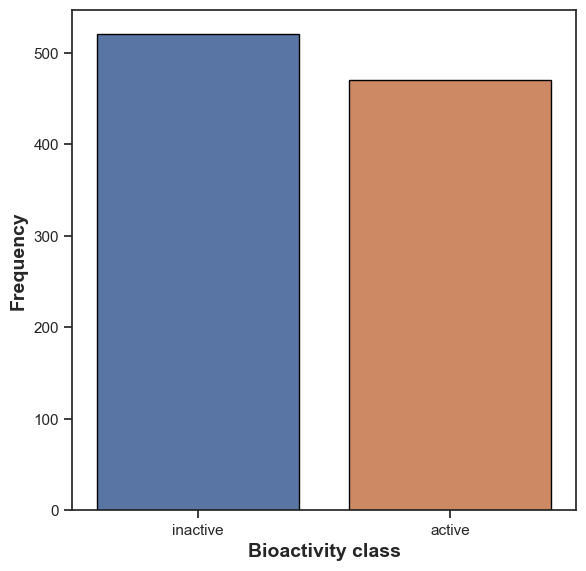

In [70]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

plt.figure(figsize=(6.5, 6.5))

sns.countplot(x='classification', data=finaldf_class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')



Scatter plot of Molecular Weight vs LogP

/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

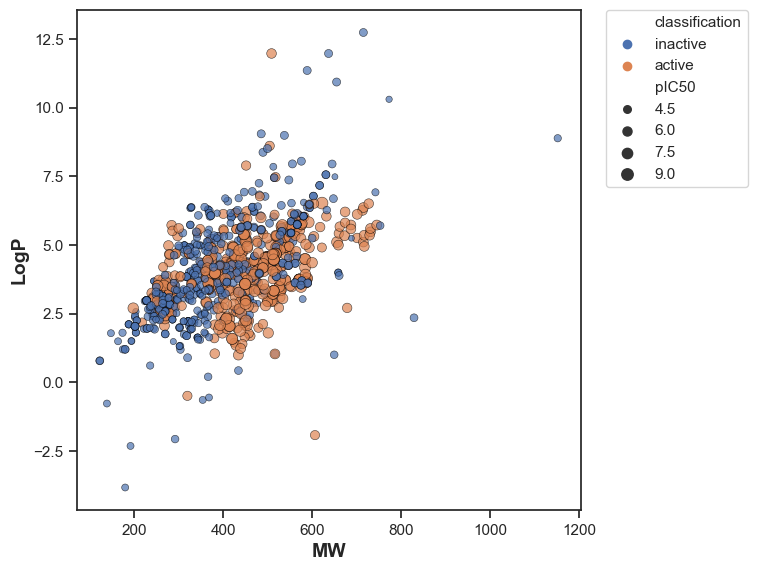

In [71]:
plt.figure(figsize=(6.5, 6.5))

sns.scatterplot(x='MW', y='LogP', data=finaldf_class, hue='classification', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


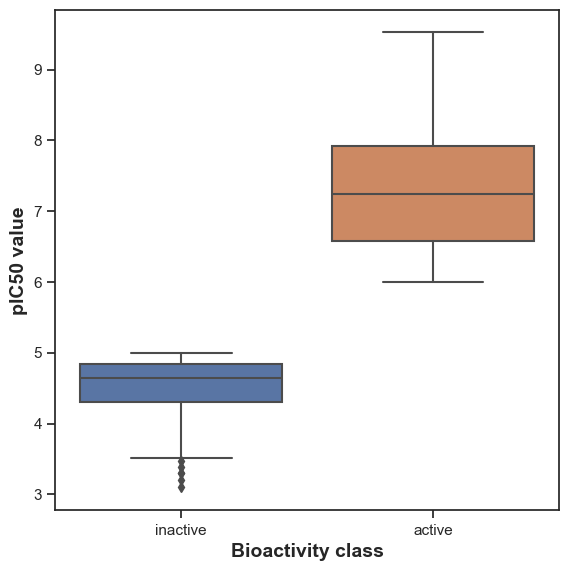

In [72]:
plt.figure(figsize=(6.5, 6.5))

sns.boxplot(x = 'classification', y = 'pIC50', data = finaldf_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Mann-Whitney U Test

In [92]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'classification']
  df = finaldf_class[selection]
  active = df[df.classification == 'active'].dropna()
  active = active[descriptor]

  selection = [descriptor, 'classification']
  df = finaldf_class[selection]
  inactive = df[df.classification == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)


  return results

mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,243828.0,9.756114e-163,0.05,Different distribution (reject H0)


/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,160624.0,2.102685e-17,0.05,Different distribution (reject H0)


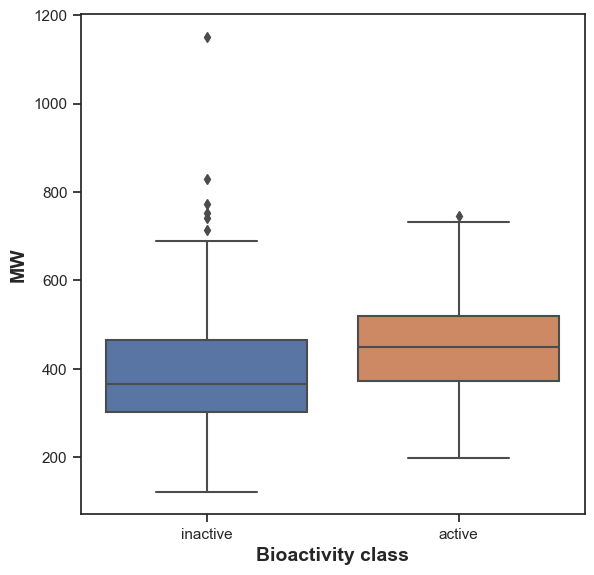

In [93]:
plt.figure(figsize=(6.5, 6.5))

sns.boxplot(x = 'classification', y = 'MW', data = finaldf_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

mannwhitney('MW')

/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,131695.0,0.039585,0.05,Different distribution (reject H0)


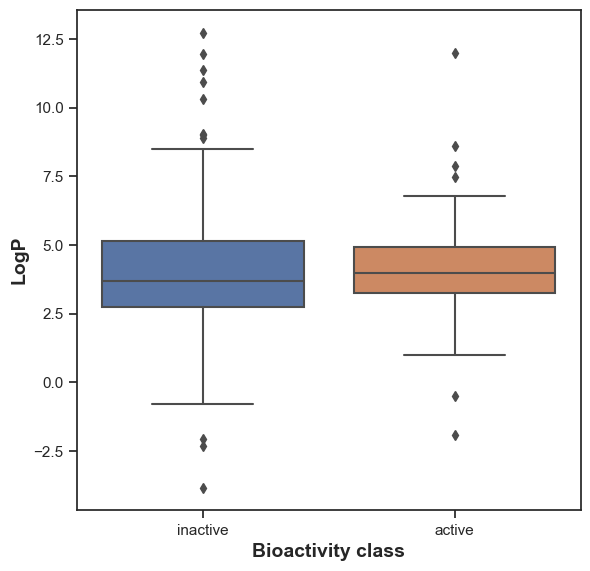

In [94]:
plt.figure(figsize=(6.5, 6.5))

sns.boxplot(x = 'classification', y = 'LogP', data = finaldf_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')
mannwhitney('LogP')

/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,93342.5,1.915049e-11,0.05,Different distribution (reject H0)


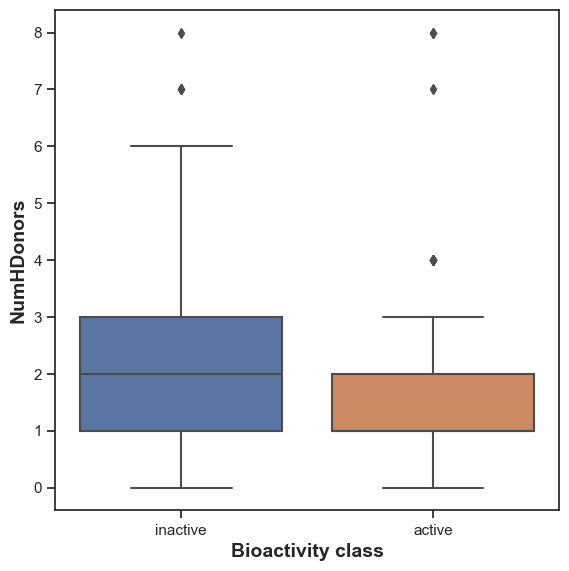

In [95]:
plt.figure(figsize=(6.5, 6.5))

sns.boxplot(x = 'classification', y = 'NumHDonors', data = finaldf_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')
mannwhitney('NumHDonors')

/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/om/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,154315.0,6.566458e-13,0.05,Different distribution (reject H0)


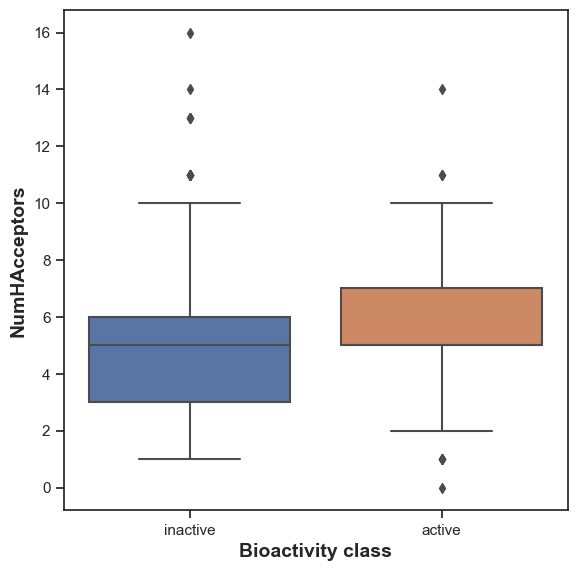

In [96]:
plt.figure(figsize=(6.5, 6.5))

sns.boxplot(x = 'classification', y = 'NumHAcceptors', data = finaldf_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')
mannwhitney('NumHAcceptors')

Interpreting the Statistical Results

pIC50 and Lipinksi Descriptors shows a statistically significant difference between compounds that are active and inactive.

This was expected as Active = pIC50 > 6 and Inactive = pIC50 < 5